In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Levanto la data  
url = 'https://raw.githubusercontent.com/xlisouski/DataCoder/main/Titanic.csv'
df = pd.read_csv(url, sep = ',')

## Variable target
Vamos a trabajar con el dataset de Titanic, por lo que nuestra variable target indica un 1 si el pasajero sobrevivió, y un 0 si no sobrevivió. 
<br>

El objetivo del análisis es determinar cuáles son los mejores patrones para diferenciar a los pasajeros que sobrevivieron de quienes no. 

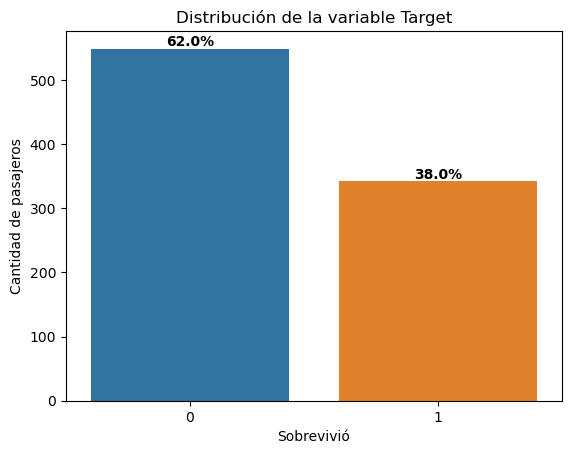

In [3]:
# Analicemos la distribución de nuestra variable target
cantidad = len(df['Survived'])

sns.countplot(data = df,
              x = "Survived")
plt.xlabel('Sobrevivió')
plt.ylabel('Cantidad de pasajeros')
plt.title('Distribución de la variable Target')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{str(round(int(y_text)/cantidad,2) * 100)}%', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()


Se puede observar que un 38% de los pasajeros han sobrevivido. 

## Information Value: ¿Qué es? 
Es una métrica que nos ayuda a responder la siguiente pregunta: 
<br>
**¿Cuánta información útil aporta esta variable para predecir el resultado deseado?**
<br>
<br>
**Pasos para el cálculo:**
1. Se debe genrar una categorización de la variable (si es numérica, "binnearla" de alguna manera, estableciendo rangos para el análisis)
2. Se genera una tabla agrupada de la variable categorizada vs la variable target binaria. El objetivo es saber para cada categoría, qué cantidad de 1 y qué cantidad de 0 se observaron, para calcular "Tasa_Exito" (porcentajes de 1) y "Tasa_No_Exito" (porcentajes de 0). 
3. Se calcula el logaritmo natural del cociente entre la tasa de exito y no exito para cada categoría. 
4. Se calcula el porcentaje de éxitos que representa cada categoría. Lo mismo para los no éxitos. Se restan ambas columnas.  
5. Se multiplican 3 y 4
6. Se suma 5

## Manos a la obra!
Calculemos el IV de la variable sexo y del tipo de clase del ticket. Ya son variables categóricas, por lo que no es necesario categorizarlas. 


In [5]:
# Genero un dataframe que voy a ir completando con cada IV
IV_df = pd.DataFrame(columns=['Variable', 'IV'])
IV_df.head()

,Variable,IV


In [6]:
# Information value para Sex
tabla_IV = df.groupby('Sex').agg(      
    Cant = ('Survived', 'count'),
    Cant_Exito = ('Survived', 'sum'),    
    Tasa_Exito = ('Survived', 'mean')
).reset_index()
tabla_IV['Tasa_No_Exito'] = 1 - tabla_IV['Tasa_Exito']
tabla_IV['Cant_No_Exito'] = tabla_IV['Cant'] - tabla_IV['Cant_Exito']
tabla_IV['LN'] = np.log(tabla_IV['Tasa_Exito'] / tabla_IV['Tasa_No_Exito'])
tabla_IV['Pct_Exitos'] = tabla_IV['Cant_Exito'] / sum(tabla_IV['Cant_Exito'])
tabla_IV['Pct_NoExitos'] = tabla_IV['Cant_No_Exito'] / sum(tabla_IV['Cant_No_Exito'])
tabla_IV['Resta'] = tabla_IV['Pct_Exitos'] - tabla_IV['Pct_NoExitos']
tabla_IV['IV'] = tabla_IV['Resta'] * tabla_IV['LN'] 
tabla_IV

,Sex,Cant,Cant_Exito,Tasa_Exito,Tasa_No_Exito,Cant_No_Exito,LN,Pct_Exitos,Pct_NoExitos,Resta,IV
0,female,314,233,0.742038,0.257962,81,1.056589,0.681287,0.147541,0.533746,0.563950
1,male,577,109,0.188908,0.811092,468,-1.457120,0.318713,0.852459,-0.533746,0.777732


In [7]:
# Relleno mi tabla de referencias 
nuevo_dato = {'Variable': 'Sex', 'IV': sum(tabla_IV['IV'])}
IV_df = IV_df.append(nuevo_dato, ignore_index=True)

C:\Users\usernosis\AppData\Local\Temp\ipykernel_18196\2681855043.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  IV_df = IV_df.append(nuevo_dato, ignore_index=True)


In [8]:
IV_df.head()

,Variable,IV
0,Sex,1.341681


In [9]:
# Information value para Pclass
tabla_IV = df.groupby('Pclass').agg(      
    Cant = ('Survived', 'count'),
    Cant_Exito = ('Survived', 'sum'),    
    Tasa_Exito = ('Survived', 'mean')
).reset_index()
tabla_IV['Tasa_No_Exito'] = 1 - tabla_IV['Tasa_Exito']
tabla_IV['Cant_No_Exito'] = tabla_IV['Cant'] - tabla_IV['Cant_Exito']
tabla_IV['LN'] = np.log(tabla_IV['Tasa_Exito'] / tabla_IV['Tasa_No_Exito'])
tabla_IV['Pct_Exitos'] = tabla_IV['Cant_Exito'] / sum(tabla_IV['Cant_Exito'])
tabla_IV['Pct_NoExitos'] = tabla_IV['Cant_No_Exito'] / sum(tabla_IV['Cant_No_Exito'])
tabla_IV['Resta'] = tabla_IV['Pct_Exitos'] - tabla_IV['Pct_NoExitos']
tabla_IV['IV'] = tabla_IV['Resta'] * tabla_IV['LN'] 
tabla_IV

,Pclass,Cant,Cant_Exito,Tasa_Exito,Tasa_No_Exito,Cant_No_Exito,LN,Pct_Exitos,Pct_NoExitos,Resta,IV
0,1,216,136,0.629630,0.370370,80,0.530628,0.397661,0.145719,0.251941,0.133687
1,2,184,87,0.472826,0.527174,97,-0.108803,0.254386,0.176685,0.077701,-0.008454
2,3,491,119,0.242363,0.757637,372,-1.139770,0.347953,0.677596,-0.329642,0.375717


In [10]:
# Relleno mi tabla de referencias 
nuevo_dato = {'Variable': 'PClass', 'IV': sum(tabla_IV['IV'])}
IV_df = IV_df.append(nuevo_dato, ignore_index=True)
IV_df.head()

C:\Users\usernosis\AppData\Local\Temp\ipykernel_18196\1223318887.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  IV_df = IV_df.append(nuevo_dato, ignore_index=True)


,Variable,IV
0,Sex,1.341681
1,PClass,0.500950


## Vamos a agregar la variable edad 
Para ello, primero hay que categorizarla. 
Definamos los siguientes cortes: 
- Bebes: Entre 0 y 3 años
- Niños: Entre 4 y 10 años 
- Adolescentes: Entre 10 y 18 años 
- Jóvenes: Entre 18 y 25 años 
- Adultos Medios: Entre 25 y 40 años
- Adultos Mayores: Entre 40 y 55 años 
- Ancianos: Más de 55 años. 


In [11]:
# Defino cortes
bin_edges = [-1, 3,10, 18, 25,40, 55, 99999]
bin_labels = ['Bebes','Niños','Adolescentes','Jovenes', 'Adultos Medios','Adultos Mayores', 'Ancianos']

# Las categorizo
df['Age_Bin'] = pd.cut(df['Age'], 
                                  bins = bin_edges, 
                                  labels = bin_labels, 
                                  include_lowest = True)

# A ver, qué construí? 
df.groupby('Age_Bin').agg(      
    MINIMO = ('Age', 'min'),
    MAXIMO = ('Age', 'max'),
    Cantidad = ('Age','count')
).reset_index()


,Age_Bin,MINIMO,MAXIMO,Cantidad
0,Bebes,0.42,3.0,30
1,Niños,4.00,10.0,34
2,Adolescentes,11.00,18.0,75
3,Jovenes,19.00,25.0,162
4,Adultos Medios,26.00,40.0,263
5,Adultos Mayores,40.50,55.0,110
6,Ancianos,55.50,80.0,40


In [12]:
# Information value para Age_Bin
tabla_IV = df.groupby('Age_Bin').agg(      
    Cant = ('Survived', 'count'),
    Cant_Exito = ('Survived', 'sum'),    
    Tasa_Exito = ('Survived', 'mean')
).reset_index()
tabla_IV['Tasa_No_Exito'] = 1 - tabla_IV['Tasa_Exito']
tabla_IV['Cant_No_Exito'] = tabla_IV['Cant'] - tabla_IV['Cant_Exito']
tabla_IV['LN'] = np.log(tabla_IV['Tasa_Exito'] / tabla_IV['Tasa_No_Exito'])
tabla_IV['Pct_Exitos'] = tabla_IV['Cant_Exito'] / sum(tabla_IV['Cant_Exito'])
tabla_IV['Pct_NoExitos'] = tabla_IV['Cant_No_Exito'] / sum(tabla_IV['Cant_No_Exito'])
tabla_IV['Resta'] = tabla_IV['Pct_Exitos'] - tabla_IV['Pct_NoExitos']
tabla_IV['IV'] = tabla_IV['Resta'] * tabla_IV['LN'] 
tabla_IV

,Age_Bin,Cant,Cant_Exito,Tasa_Exito,Tasa_No_Exito,Cant_No_Exito,LN,Pct_Exitos,Pct_NoExitos,Resta,IV
0,Bebes,30,20,0.666667,0.333333,10,0.693147,0.068966,0.023585,0.045381,0.031455
1,Niños,34,18,0.529412,0.470588,16,0.117783,0.062069,0.037736,0.024333,0.002866
2,Adolescentes,75,32,0.426667,0.573333,43,-0.295464,0.110345,0.101415,0.008930,-0.002638
3,Jovenes,162,54,0.333333,0.666667,108,-0.693147,0.186207,0.254717,-0.068510,0.047488
4,Adultos Medios,263,111,0.422053,0.577947,152,-0.314350,0.382759,0.358491,0.024268,-0.007629
5,Adultos Mayores,110,43,0.390909,0.609091,67,-0.443493,0.148276,0.158019,-0.009743,0.004321
6,Ancianos,40,12,0.300000,0.700000,28,-0.847298,0.041379,0.066038,-0.024658,0.020893


In [13]:
# Relleno mi tabla de referencias 
nuevo_dato = {'Variable': 'Age_Bin', 'IV': sum(tabla_IV['IV'])}
IV_df = IV_df.append(nuevo_dato, ignore_index=True)
IV_df.head()

C:\Users\usernosis\AppData\Local\Temp\ipykernel_18196\1544303949.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  IV_df = IV_df.append(nuevo_dato, ignore_index=True)


,Variable,IV
0,Sex,1.341681
1,PClass,0.500950
2,Age_Bin,0.096756


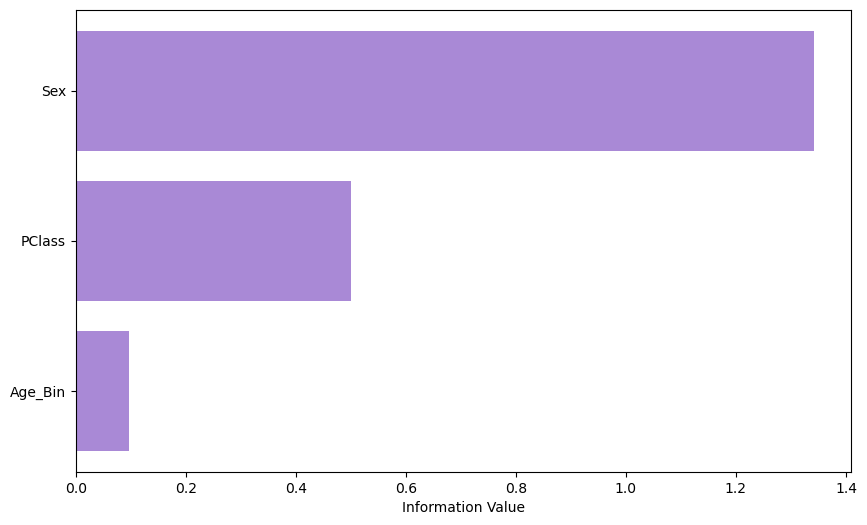

In [14]:
# Grafico el information value de cada variable
IV_df = IV_df.sort_values(by = 'IV', ascending = False)
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.barh(IV_df['Variable'], 
         IV_df['IV'],
         color = '#A989D6')
plt.xlabel('Information Value')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la característica más relevante en la parte superior
plt.show()

# Por qué 'Sex' es la variable con mayor IV? 
Veamos cómo se encuentra distribuida la variable dependiendo del target. 

<Axes: xlabel='Sex', ylabel='Survived'>

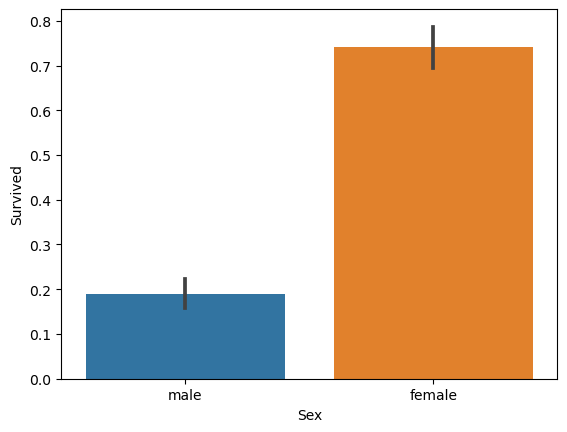

In [15]:
# Tasas de éxito 
sns.barplot(data = df,
                x = 'Sex',
                y = 'Survived')

## Entonces: 
Se puede observar que sobrevivieron un 74% de las mujeres, y un 19% de los hombres. 
<br/><br>
Si tenemos en cuenta la tasa promedio de supervivencia de todos los pasajeros (es decir, un 38% de los pasajeros sobrevivieron, indistintamente de si son hombres o mujeres), podemos ver amplias diferencias en las tasas de diferencia de cada subsegmento de la población teninedo en cuenta esta característica. 
<br/><br> 
**Es decir:**
<br>
* Si sos mujer, tenes un 74% de probabilidad de sobrevivir al Titanic. Esto es un 95% más respecto del promedio (74% es un 95% superior a 38%). 
<br>
* Si sos hombre, tenes un 19% de probabilidad de sobrevivir al Titanic. Esto es un 50% menos respecto del promedio (19% es un 50% inferior a 38%). 
<br/><br>

**Conclusión:**
<br> 
El hecho de ser hombre o mujer denota una característica que evidencia extremas diferencias en la probabilidad de sobrevivir al accidente de Titanic, por lo que tiene sentido que esta variable sea una de las más relevantes al momento de intentar pronosticar qué pasajero tiene más chances de sobrevivir al accidente. 

# Por qué 'Age_Bin' es la variable con menor IV? 
Veamos cómo se encuentra distribuida la variable dependiendo del target. 

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Bebes'),
  Text(1, 0, 'Niños'),
  Text(2, 0, 'Adolescentes'),
  Text(3, 0, 'Jovenes'),
  Text(4, 0, 'Adultos Medios'),
  Text(5, 0, 'Adultos Mayores'),
  Text(6, 0, 'Ancianos')])

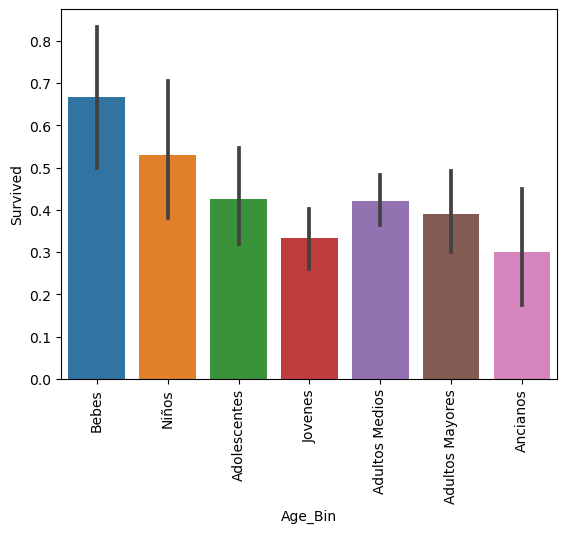

In [17]:
# Tasas de éxito 
sns.barplot(data = df,
                x = 'Age_Bin',
                y = 'Survived')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Distribución de Edad según supervivencia')

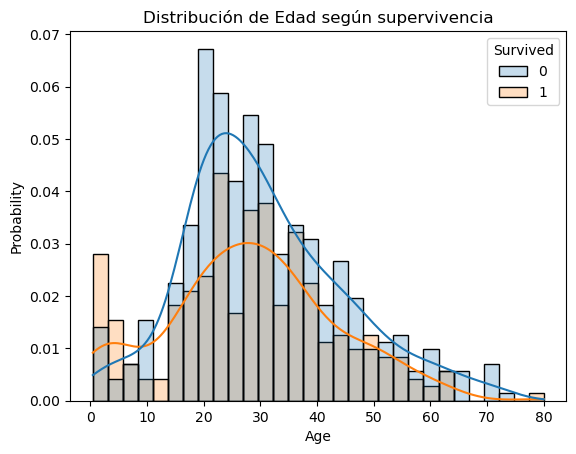

In [18]:
# Y la distribución de la edad cambia en los supervivientes respecto de los que no? 
plt.figure()
# Histograma
sns.histplot(data = df,
             x = 'Age',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat = 'probability',
             hue = 'Survived')
plt.title('Distribución de Edad según supervivencia')

## Qué vemos? 
Se aprecia una ligera concentración en edades más bajas cuando estamos en el segmento de supervivientes, lo que indicaría que los más pequeños tienen más chances de sobrevivir. 

## Tiene alguna influencia el tipo de ticket que han comprado? 
Veamos ahora cómo se comporta la edad en conjunto con el tipo de ticket que ha comprado cada pasajero. 

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Bebes'),
  Text(1, 0, 'Niños'),
  Text(2, 0, 'Adolescentes'),
  Text(3, 0, 'Jovenes'),
  Text(4, 0, 'Adultos Medios'),
  Text(5, 0, 'Adultos Mayores'),
  Text(6, 0, 'Ancianos')])

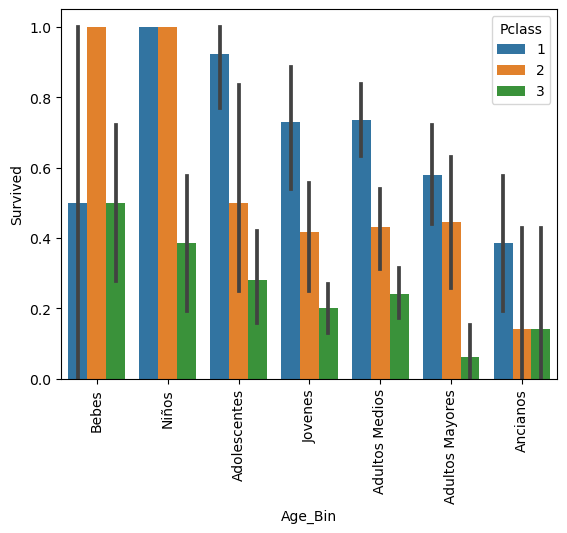

In [20]:
# Tasas de éxito 
sns.barplot(data = df,
                x = 'Age_Bin',
                y = 'Survived',
           hue = 'Pclass')
plt.xticks(rotation=90)

## Intentemos explicar lo que vemos... 
Si bien en principio la variable por si misma pareciera no contar con tanto poder predictivo, cuando la combinamos con el tipo de ticket que ha comprado cada uno se puede ver la gran diferencia de tasas, fundamentalmente a partir de ser adolescente, dependiendo del tipo de ticket comprado. 
<br>
Entonces, para medir este efecto, construyamos una nueva variable que combine la edad y el tipo de ticket. 
Armaremos las siguientes categorías: 
- Bebes: Entre 0 y 3 años
- Niños: Entre 4 y 10 años 
- Adolescentes Clase Alta (AD_Clase1): Entre 10 y 18 años con ticket 1 
- Adolescentes Clase Media (AD_Clase2): Entre 10 y 18 años con ticket 2
- Adolescentes Clase Baja (AD_Clase3): Entre 10 y 18 años con ticket 3 
- Jóvenes Clase Alta (Jov_Clase1): Entre 18 y 25 años con ticket 1 
- Jóvenes Clase Media (Jov_Clase2): Entre 18 y 25 años con ticket 2 
- Jóvenes Clase Baja (Jov_Clase3): Entre 18 y 25 años con ticket 3
- Adultos Medios Clase Alta (AdultMed_Clase1): Entre 25 y 40 años con ticket 1 
- Adultos Medios Clase Media (AdultMed_Clase2): Entre 25 y 40 años con ticket 2 
- Adultos Medios Clase Baja (AdultMed_Clase3): Entre 25 y 40 años con ticket 3 
- Adultos Mayores Clase Alta (AdultMay_Clase1): Entre 40 y 55 años con ticket 1
- Adultos Mayores Clase Media (AdultMay_Clase2): Entre 40 y 55 años con ticket 2
- Adultos Mayores Clase Baja (AdultMay_Clase3): Entre 40 y 55 años con ticket 3
- Ancianos: Más de 55 años. 

In [21]:
# Entonces, vamos a construirla: 

# Primero: Defino la función clasificadora: 
def clasifica_age_pclass(age, Pclass):
    if (age <= 3):
        return "01_Bebes"
    elif (age <= 10):
        return "02_Niños"
    elif (age <= 18) and (Pclass == 1):
        return "03_AD_Clase1"
    elif (age <= 18) and (Pclass == 2):
        return "04_AD_Clase2"
    elif (age <= 18) and (Pclass == 3):
        return "05_AD_Clase3"
    elif (age <= 25) and (Pclass == 1):
        return "06_Jov_Clase1"
    elif (age <= 25) and (Pclass == 2):
        return "07_Jov_Clase2"
    elif (age <= 25) and (Pclass == 3):
        return "08_Jov_Clase3"
    elif (age <= 40) and (Pclass == 1):
        return "09_AdultMed_Clase1"
    elif (age <= 40) and (Pclass == 2):
        return "10_AdultMed_Clase2"
    elif (age <= 40) and (Pclass == 3):
        return "11_AdultMed_Clase3"
    elif (age <= 55) and (Pclass == 1):
        return "12_AdultMay_Clase1"
    elif (age <= 55) and (Pclass == 2):
        return "13_AdultMay_Clase2"
    elif (age <= 55) and (Pclass == 3):
        return "14_AdultMay_Clase3"
    elif (age > 55):
        return "15_Ancianos"
    else:
        return "16_Sin_Dato"


In [22]:
# Aplico el clasificador
df['Age_Bin_PClass'] =  df.apply(lambda row: clasifica_age_pclass(row['Age'], row['Pclass']), 
                                 axis = 1)

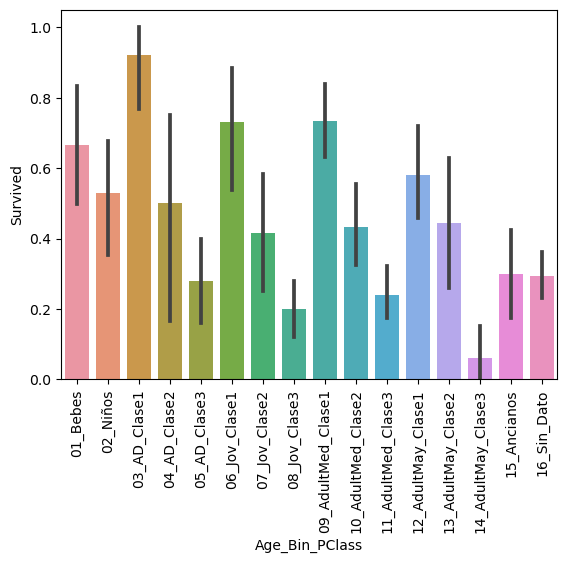

In [23]:
# Visualmente: 
sns.barplot(data = df.sort_values(by='Age_Bin_PClass'),
                x = 'Age_Bin_PClass',
                y = 'Survived') 
plt.xticks(rotation=90)
plt.show()

In [24]:
# Information value para Age_Bin
tabla_IV = df.groupby('Age_Bin_PClass').agg(      
    Cant = ('Survived', 'count'),
    Cant_Exito = ('Survived', 'sum'),    
    Tasa_Exito = ('Survived', 'mean')
).reset_index()
tabla_IV['Tasa_No_Exito'] = 1 - tabla_IV['Tasa_Exito']
tabla_IV['Cant_No_Exito'] = tabla_IV['Cant'] - tabla_IV['Cant_Exito']
tabla_IV['LN'] = np.log(tabla_IV['Tasa_Exito'] / tabla_IV['Tasa_No_Exito'])
tabla_IV['Pct_Exitos'] = tabla_IV['Cant_Exito'] / sum(tabla_IV['Cant_Exito'])
tabla_IV['Pct_NoExitos'] = tabla_IV['Cant_No_Exito'] / sum(tabla_IV['Cant_No_Exito'])
tabla_IV['Resta'] = tabla_IV['Pct_Exitos'] - tabla_IV['Pct_NoExitos']
tabla_IV['IV'] = tabla_IV['Resta'] * tabla_IV['LN'] 
tabla_IV

,Age_Bin_PClass,Cant,Cant_Exito,Tasa_Exito,Tasa_No_Exito,Cant_No_Exito,LN,Pct_Exitos,Pct_NoExitos,Resta,IV
0,01_Bebes,30,20,0.666667,0.333333,10,0.693147,0.058480,0.018215,0.040265,0.027909
1,02_Niños,34,18,0.529412,0.470588,16,0.117783,0.052632,0.029144,0.023488,0.002766
2,03_AD_Clase1,13,12,0.923077,0.076923,1,2.484907,0.035088,0.001821,0.033266,0.082663
3,04_AD_Clase2,12,6,0.500000,0.500000,6,0.000000,0.017544,0.010929,0.006615,0.000000
4,05_AD_Clase3,50,14,0.280000,0.720000,36,-0.944462,0.040936,0.065574,-0.024638,0.023270
5,06_Jov_Clase1,26,19,0.730769,0.269231,7,0.998529,0.055556,0.012750,0.042805,0.042742
6,07_Jov_Clase2,36,15,0.416667,0.583333,21,-0.336472,0.043860,0.038251,0.005608,-0.001887
7,08_Jov_Clase3,100,20,0.200000,0.800000,80,-1.386294,0.058480,0.145719,-0.087240,0.120940
8,09_AdultMed_Clase1,68,50,0.735294,0.264706,18,1.021651,0.146199,0.032787,0.113412,0.115867
9,10_AdultMed_Clase2,74,32,0.432432,0.567568,42,-0.271934,0.093567,0.076503,0.017065,-0.004640


In [25]:
# Relleno mi tabla de referencias 
nuevo_dato = {'Variable': 'Age_Bin_Pclass', 'IV': sum(tabla_IV['IV'])}
IV_df = IV_df.append(nuevo_dato, ignore_index=True)
IV_df.head()

C:\Users\usernosis\AppData\Local\Temp\ipykernel_18196\2608191002.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  IV_df = IV_df.append(nuevo_dato, ignore_index=True)


,Variable,IV
0,Sex,1.341681
1,PClass,0.500950
2,Age_Bin,0.096756
3,Age_Bin_Pclass,0.737055


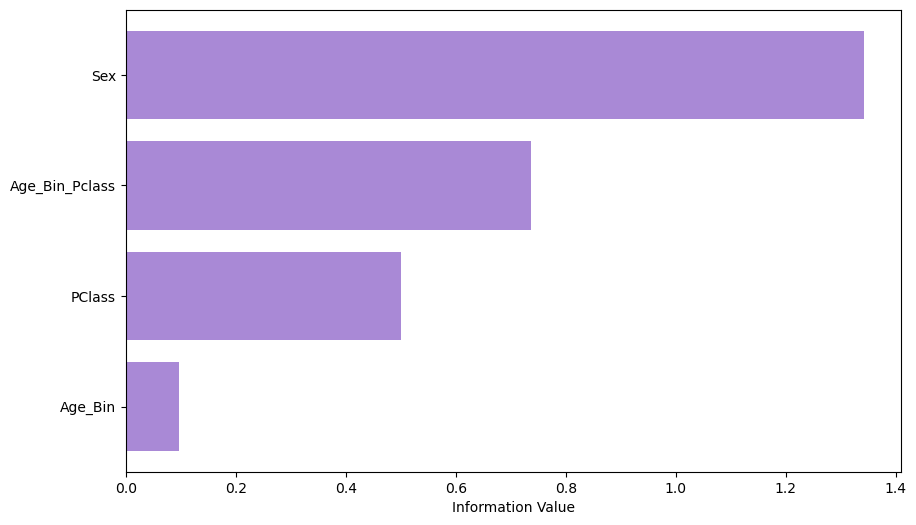

In [26]:
# Grafico el information value de cada variable
IV_df = IV_df.sort_values(by = 'IV', ascending = False)
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.barh(IV_df['Variable'], 
         IV_df['IV'],
         color = '#A989D6')
plt.xlabel('Information Value')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la característica más relevante en la parte superior
plt.show()

# Conclusión:
Una variable por si misma no necesariamente es poco predictiva, sino que quizás es necesario combinarla con otro dato para potenciar su poder predictivo. 

# Generando una función para calcular IV a muchas columnas
Vamos a armar una función que nos permita indicarle el dataframe, el nombre de las columnas, el nombre del target y nos devuelva la tablita de IV. 

In [27]:
# Primer paso: definir el nombre de la función y sus parámetros
def calculadora_IV(lista_variables,target):
    """
    Esta función calcula el IV de una lista de variables categóricas vs un flag binario.

    Args:
        lista_variables: Lista que incluya el nombre de cada variable a la que se le quiere calcular el IV.
        target: Nombre de la columna que contiene a la variable target.

    Returns:
        Dataframe con dos columnas: Variable (nombre de la variable) e IV (Information Value).
    """
    
    # Calculo la cantidad de variables que se van a recorrer
    cantidad_variables = len(lista_variables)
    
    # Genero el dataframe que se entregará al final, vacío
    IV_df = pd.DataFrame(columns=['Variable', 'IV'])        
    
    # Genero un loop que recorre cada elemento de la lista de nombres de variables que se quiere generar el cálculo
    for i in range(cantidad_variables):
    
        # Calculo tablita agrupada por cada variable
        tabla_IV = df.groupby(lista_variables[i]).agg(      
            Cant = (target, 'count'),
            Cant_Exito = (target, 'sum'),    
            Tasa_Exito = (target, 'mean')
        ).reset_index()
        
        # Agrego la "Tasa de No Exito"
        tabla_IV['Tasa_No_Exito'] = 1 - tabla_IV['Tasa_Exito']
        
        # Agrego la "Cantidad de casos de No Exito"
        tabla_IV['Cant_No_Exito'] = tabla_IV['Cant'] - tabla_IV['Cant_Exito']
        
        # Hago cálculos necesarios para llegar al IV
        tabla_IV['LN'] = np.log(tabla_IV['Tasa_Exito'] / tabla_IV['Tasa_No_Exito'])
        tabla_IV['Pct_Exitos'] = tabla_IV['Cant_Exito'] / sum(tabla_IV['Cant_Exito'])
        tabla_IV['Pct_NoExitos'] = tabla_IV['Cant_No_Exito'] / sum(tabla_IV['Cant_No_Exito'])
        tabla_IV['Resta'] = tabla_IV['Pct_Exitos'] - tabla_IV['Pct_NoExitos']
        tabla_IV['IV'] = tabla_IV['Resta'] * tabla_IV['LN'] 
        
        # Agrego el IV como un registro más en la tabla que generé
        nuevo_dato = {'Variable': lista_variables[i], 'IV': sum(tabla_IV['IV'])}
        IV_df = IV_df.append(nuevo_dato, ignore_index=True)

    return IV_df

In [45]:
help(calculadora_IV)

Help on function calculadora_IV in module __main__:

calculadora_IV(lista_variables, target)
    Esta función calcula el IV de una lista de variables categóricas vs un flag binario.
    
    Args:
        lista_variables: Lista que incluya el nombre de cada variable a la que se le quiere calcular el IV.
        target: Nombre de la columna que contiene a la variable target.
    
    Returns:
        Dataframe con dos columnas: Variable (nombre de la variable) e IV (Information Value).



In [28]:
# Vamos a probarla: 
variables_calcular = ['Sex','Pclass','Age_Bin','Age_Bin_PClass']

tabla_iv = calculadora_IV(variables_calcular,'Survived')
tabla_iv.sort_values(by = 'IV', ascending = False)

C:\Users\usernosis\AppData\Local\Temp\ipykernel_18196\362610380.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  IV_df = IV_df.append(nuevo_dato, ignore_index=True)
C:\Users\usernosis\AppData\Local\Temp\ipykernel_18196\362610380.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  IV_df = IV_df.append(nuevo_dato, ignore_index=True)
C:\Users\usernosis\AppData\Local\Temp\ipykernel_18196\362610380.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  IV_df = IV_df.append(nuevo_dato, ignore_index=True)
C:\Users\usernosis\AppData\Local\Temp\ipykernel_18196\362610380.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  IV_df = IV_df.append

,Variable,IV
0,Sex,1.341681
3,Age_Bin_PClass,0.737055
1,Pclass,0.500950
2,Age_Bin,0.096756
